# Flower Classification using CNN with Augmentation

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import pathlib
from tensorflow import keras
import os
import PIL

## Load flowers dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 305s 1us/step


In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
list(data_dir.glob("*/*.jpg"))[1:6]

[WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg')]

In [10]:
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [11]:
roses=list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

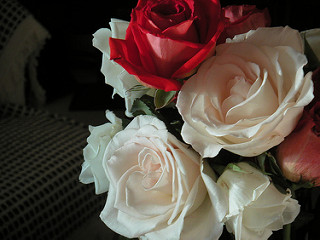

In [13]:
PIL.Image.open(str(roses[1]))

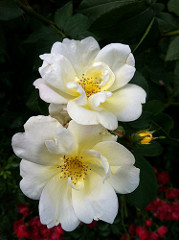

In [14]:
PIL.Image.open(str(roses[0]))

In [15]:
tulips=list(data_dir.glob("tulips/*"))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

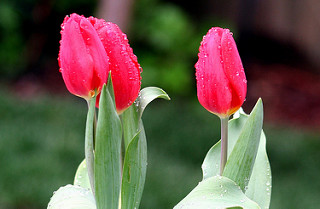

In [16]:
PIL.Image.open(str(tulips[0]))

## Reading the images from the disc into the numpy array

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
    }

In [25]:
flowers_images_dict["roses"][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [26]:
str(flowers_images_dict["roses"][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [28]:
img=cv2.imread(str(flowers_images_dict["roses"][0]))
img.shape

(240, 179, 3)

In [33]:
img_=cv2.imread(str(flowers_images_dict["roses"][1]))
img_.shape

(240, 320, 3)

As we can see that the images are of different sizes so we need to convert it to the same size before training the model

In [34]:
 img.resize(180,180,3)

In [35]:
img.shape

(180, 180, 3)

In [36]:
cv2.resize(img_,(180,180)).shape

(180, 180, 3)

In [37]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
X_train

array([[[[ 13,  29,  45],
         [ 13,  30,  44],
         [ 12,  27,  43],
         ...,
         [  4,   4,  18],
         [  4,   5,  18],
         [  3,   5,  16]],

        [[ 13,  29,  44],
         [ 12,  28,  44],
         [ 12,  27,  43],
         ...,
         [  0,   3,  17],
         [  1,   4,  17],
         [  1,   3,  15]],

        [[ 14,  30,  46],
         [ 14,  29,  45],
         [ 13,  29,  45],
         ...,
         [  0,   3,  17],
         [  0,   2,  16],
         [  1,   4,  14]],

        ...,

        [[ 17,  37,  48],
         [ 18,  37,  50],
         [ 19,  37,  49],
         ...,
         [  0,   5,  18],
         [  0,   5,  18],
         [  1,   4,  17]],

        [[ 19,  38,  49],
         [ 19,  38,  50],
         [ 19,  37,  49],
         ...,
         [  0,   5,  17],
         [  0,   6,  18],
         [  1,   5,  17]],

        [[ 22,  40,  51],
         [ 20,  40,  51],
         [ 22,  39,  51],
         ...,
         [  3,   7,  18],
        

### Lets scale the given images 

In [47]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [48]:
X_train_scaled

array([[[[0.05098039, 0.11372549, 0.17647059],
         [0.05098039, 0.11764706, 0.17254902],
         [0.04705882, 0.10588235, 0.16862745],
         ...,
         [0.01568627, 0.01568627, 0.07058824],
         [0.01568627, 0.01960784, 0.07058824],
         [0.01176471, 0.01960784, 0.0627451 ]],

        [[0.05098039, 0.11372549, 0.17254902],
         [0.04705882, 0.10980392, 0.17254902],
         [0.04705882, 0.10588235, 0.16862745],
         ...,
         [0.        , 0.01176471, 0.06666667],
         [0.00392157, 0.01568627, 0.06666667],
         [0.00392157, 0.01176471, 0.05882353]],

        [[0.05490196, 0.11764706, 0.18039216],
         [0.05490196, 0.11372549, 0.17647059],
         [0.05098039, 0.11372549, 0.17647059],
         ...,
         [0.        , 0.01176471, 0.06666667],
         [0.        , 0.00784314, 0.0627451 ],
         [0.00392157, 0.01568627, 0.05490196]],

        ...,

        [[0.06666667, 0.14509804, 0.18823529],
         [0.07058824, 0.14509804, 0.19607843]

## Lets build the model

In [70]:
num_classes=5

model=keras.Sequential([
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])

model.compile(
       optimizer="adam",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"]
)

model.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
92/92 [==============================] - 191s 2s/step - loss: 1.8000 - accuracy: 0.2231
Epoch 2/20
92/92 [==============================] - 190s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 3/20
92/92 [==============================] - 193s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 4/20
92/92 [==============================] - 211s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 5/20
92/92 [==============================] - 190s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 6/20
92/92 [==============================] - 186s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 7/20
92/92 [==============================] - 186s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 8/20
92/92 [==============================] - 191s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 9/20
92/92 [==============================] - 190s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 10/20
92/92 [==============================] - 186s 2s/step - loss: 1.6094 - accuracy: 0.2306
Epoch 11/

KeyboardInterrupt: 

In [71]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 14s 553ms/step - loss: 1.6094 - accuracy: 0.2343


[1.6094377040863037, 0.23433242738246918]

In [72]:
predictions=model.predict(X_test_scaled)
predictions

23/23 [==============================] - 13s 540ms/step


array([[ -1.2678616 , -16.856028  , -21.61178   ,  -1.7338477 ,
        -14.943315  ],
       [ -1.5347544 , -19.001379  , -24.343653  ,  -1.7141467 ,
        -16.646338  ],
       [ -0.65566933,  -8.913905  , -11.527152  ,  -0.8945916 ,
         -8.06369   ],
       ...,
       [ -1.7734183 , -22.210743  , -28.553669  ,  -1.9991504 ,
        -19.620338  ],
       [ -1.501675  , -17.396784  , -22.209309  ,  -1.225053  ,
        -14.9386835 ],
       [ -1.5973457 , -18.579079  , -23.606108  ,  -1.366073  ,
        -15.813847  ]], dtype=float32)

In [76]:
score=tf.nn.softmax(predictions[0])

In [77]:
np.argmax(score)

0

In [78]:
y_test[0]

1

As we can see that the accuracy of the model on the test data is very low so we need to use augmentation to improve the generalization of the model 

## Improve Test Accuracy Using Data Augmentation

In [79]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

## Original Image

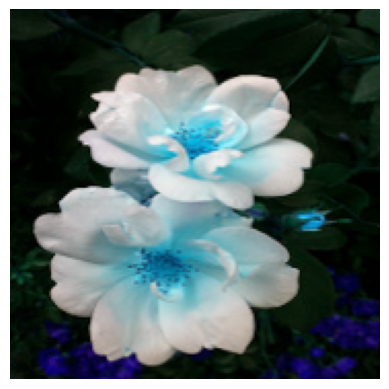

In [56]:
plt.axis("off")
plt.imshow(X[0])

## Augmented Image

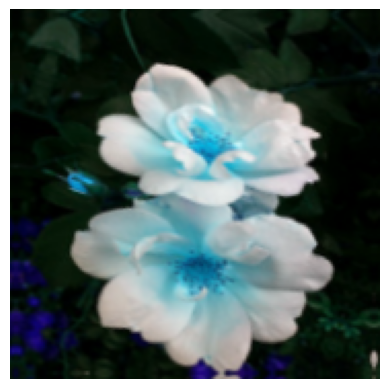

In [57]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Train the model using data augmentation and a drop out layer

In [ ]:
num_classes=5

model=keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(8,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes)
])

model.compile(
       optimizer="adam",
       loss="sparse_categorical_crossentropy",
       metrics=["accuracy"]
)

model.fit(X_train_scaled,y_train,epochs=10)

In [ ]:
model.evaluate(X_test_scaled,y_test)

### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased 